# 简易的Grid World迷宫之策略评估计算

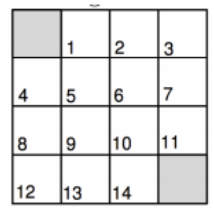

In [18]:
from IPython.display import Image
Image('./images/grid_world.png')

In [19]:
# 载入相关套件
import numpy as np
import random

In [37]:
# 游戏参数
gridSize = 4     # 4x4 格
rewardValue = -1 # 奖励
terminationStates = [[0,0], [gridSize-1, gridSize-1]] # 两个终点
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]] # 行动空间

In [38]:
# 行动及奖励
def actionValue(initialPosition,action):
    if initialPosition in terminationStates: # 到达终点
        finalPosition = initialPosition      # 不移动，留在原来位置
        reward=0  # 奖励为 0
    else:  # 不在终点，更新位置
        finalPosition = np.array(initialPosition) + np.array(action)
        reward= rewardValue  # 奖励为 -1

    # 超出边界时，仍退回原来位置
    if -1 in finalPosition or gridSize in finalPosition:
        finalPosition = initialPosition  # 退回原来位置
        reward= rewardValue  # 奖励为 -1
    
    return finalPosition, reward

## 简单的策略评估函数

In [46]:
# numIterations：训练周期
# gamma：折扣因子
# valueMap：状态值函数初始值
def policy_evaluation(numIterations,gamma,valueMap):
    valueMap1 = np.copy(valueMap)
    for i in range(numIterations):
        for state in states:        # 更新每一周期的状态值函数
            weightedRewards=0       # 平均奖励
            for action in actions:  # 计算每一行动的状态值函数
                finalPosition,reward = actionValue(state,action)
                # 贝尔曼方程式(Bellman Equation) V(s)
                weightedRewards += 1/4 * (reward + 
                     gamma * valueMap[finalPosition[0],finalPosition[1]])
            valueMap1[state[0],state[1]]=weightedRewards
        valueMap = np.copy(valueMap1)
        print(valueMap)

## 训练3周期

In [47]:
valueMap = np.zeros((gridSize, gridSize))  # 状态值函数初始值 = 0
# 状态位置 (x, y)
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]
policy_evaluation(3,1,valueMap) # 训练3周期，折扣因子=1

[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]
[[ 0.   -1.75 -2.   -2.  ]
 [-1.75 -2.   -2.   -2.  ]
 [-2.   -2.   -2.   -1.75]
 [-2.   -2.   -1.75  0.  ]]
[[ 0.     -2.4375 -2.9375 -3.    ]
 [-2.4375 -2.875  -3.     -2.9375]
 [-2.9375 -3.     -2.875  -2.4375]
 [-3.     -2.9375 -2.4375  0.    ]]
